In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

np.random.seed(0)

In [2]:
X, y = make_blobs(
    n_samples=750,
    centers=[[-2.1,-1.9],[0.2,3.2],[3.2,-1.1]],
    n_features=2,
    random_state=30
)

Y = np.eye(3)[y]

In [3]:
X

array([[-2.40249371, -2.96379773],
       [-0.7834121 ,  4.24059933],
       [-3.8206549 , -0.22976203],
       ...,
       [ 4.22161355, -0.54420595],
       [-2.48701647, -3.82730539],
       [-2.94491883, -3.37639136]])

In [4]:
Y

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]])

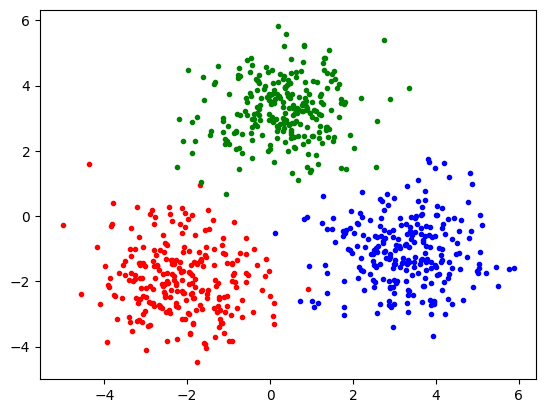

In [5]:
fig = plt.figure()
for i in range(len(y)):
    if y[i] == 0:
        plt.plot(X[i,0], X[i,1], c='r', marker='o',ms=3)
    elif y[i]==1 :
        plt.plot(X[i,0], X[i,1], c='g', marker='o',ms=3)
    else:
      plt.plot(X[i,0], X[i,1], c='b', marker='o',ms=3)

plt.show()

In [6]:
class NeuralNetwork(object):
  def __init__(self):
    inputLayerNeurons=2
    hiddenLayer1Neurons=10
    hiddenLayer2Neurons=10
    outLayerNeurons=3

    self.learning_rate=0.2
    self.W_H1I=np.random.randn(inputLayerNeurons,hiddenLayer1Neurons)
    self.W_H2H1=np.random.randn(hiddenLayer1Neurons,hiddenLayer2Neurons)
    self.W_OH2=np.random.randn(hiddenLayer2Neurons,outLayerNeurons)

  def sigmoid(self,x,der=False):
    if der==True:
      return x*(1-x)
    else:
      return 1/(1+np.exp(-x))

  def feedForward(self,X):

    X = np.asarray(X, dtype=float)
    single_input = False
    if X.ndim == 1:
        X = X.reshape(1, -1)
        single_input = True

    hidden1_input=np.dot(X,self.W_H1I)
    self.hidden1_output=self.sigmoid(hidden1_input)

    hidden2_input=np.dot(self.hidden1_output,self.W_H2H1)
    self.hidden2_output=self.sigmoid(hidden2_input)

    output_input=np.dot(self.hidden2_output,self.W_OH2)
    pred=self.sigmoid(output_input)
    return pred

  def  backForward(self,X,Y,pred):
    output_error=Y-pred
    output_delta=self.learning_rate*output_error*self.sigmoid(pred,der=True)

    hidden2_error=output_delta.dot(self.W_OH2.T)
    hidden2_delta=self.learning_rate*hidden2_error*self.sigmoid(self.hidden2_output,der=True)

    hidden1_error=hidden2_delta.dot(self.W_H2H1.T)
    hidden1_delta=self.learning_rate*hidden1_error*self.sigmoid(self.hidden1_output,der=True)

    self.W_H1I+=X.T.dot(hidden1_delta)
    self.W_H2H1+=self.hidden1_output.T.dot(hidden2_delta)
    self.W_OH2+=self.hidden2_output.T.dot(output_delta)
  def train(self,X,Y):
    output=self.feedForward(X)
    self.backForward(X,Y,output)

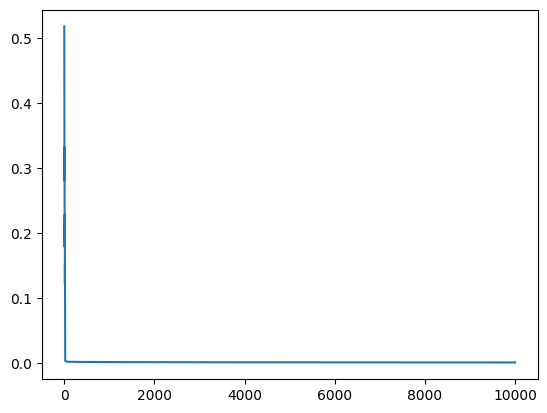

In [7]:
NN=NeuralNetwork()

err=[]

for i in range(10000):
  NN.train(X,Y)
  err.append(np.mean(np.square(Y-NN.feedForward(X))))
plt.plot(err)

In [9]:
print(NN.feedForward([-2.40249371, -2.96379773]))

[[1.00000000e+00 8.62122607e-12 3.20100582e-09]]


In [10]:
print(NN.feedForward([-0.7834121 ,  4.24059933]))

[[2.44918577e-08 9.99999969e-01 6.81200207e-07]]


In [11]:
print(NN.feedForward([-3.8206549 , -0.22976203]))

[[9.99999990e-01 1.95848897e-08 7.35580796e-09]]
